In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gonda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
df = pd.read_csv("social_media_sentiment_dataset (2).csv")

In [10]:
df.head()

,tweet_id,username,date,tweet_text
0,1,user412,01-01-2025 00:00,Careless the Laptop experience! #Customer Service
1,2,user169,01-01-2025 01:00,Great the Festival experience! #Festival
2,3,user815,01-01-2025 02:00,Overrated the Restaurant experience! #Project
3,4,user108,01-01-2025 03:00,Disappointed with the Concert experience! #Hos...
4,5,user203,01-01-2025 04:00,Late the Movie experience! #Airlines


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    10000 non-null  int64 
 1   username    10000 non-null  object
 2   date        10000 non-null  object
 3   tweet_text  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [12]:
df.describe()

,tweet_id
count,10000.00000
mean,5000.50000
std,2886.89568
min,1.00000
25%,2500.75000
50%,5000.50000
75%,7500.25000
max,10000.00000


# Data Preprocessing

In [13]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)        # remove links
    text = re.sub(r"@\w+", "", text)           # remove mentions
    text = re.sub(r"#", "", text)              # remove #
    text = re.sub(r"[^a-z\s]", "", text)       # remove special chars
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

df["clean_text"] = df["tweet_text"].apply(clean_text)


# Sentiment Analysis (TextBlob)

In [14]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_text"].apply(get_sentiment)

print(df["sentiment"].value_counts())


sentiment
Positive    5004
Negative    3964
Neutral     1032
Name: count, dtype: int64


# Visualization

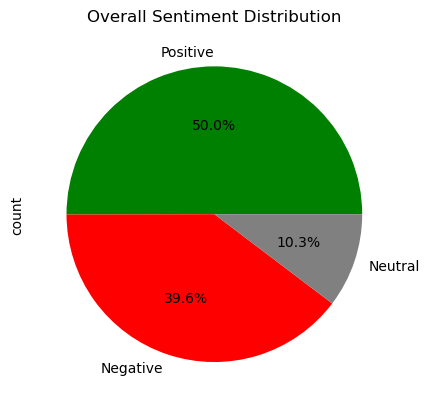

In [15]:
df["sentiment"].value_counts().plot.pie(autopct="%1.1f%%", colors=["green","red","grey"])
plt.title("Overall Sentiment Distribution")
plt.show()


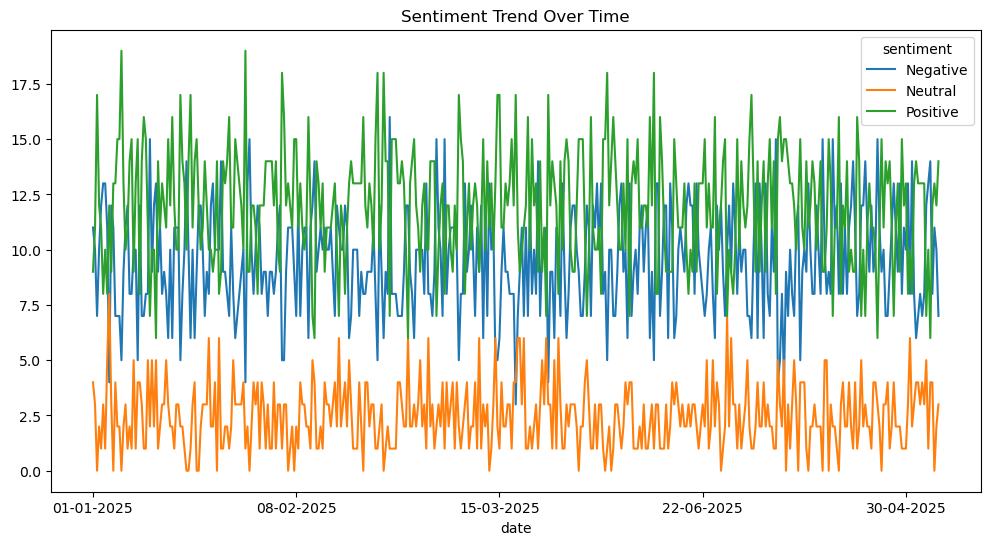

In [16]:
# # Trend over time
trend = df.groupby([df['date'].str[:10], "sentiment"]).size().unstack().fillna(0)
trend.plot(kind="line", figsize=(12,6))
plt.title("Sentiment Trend Over Time")
plt.show()


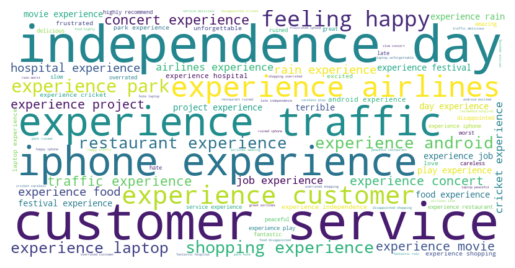

In [17]:
# WordCloud
text = " ".join(df["clean_text"])
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
positive_text = " ".join(df[df['sentiment'] == "Positive"]["clean_text"])


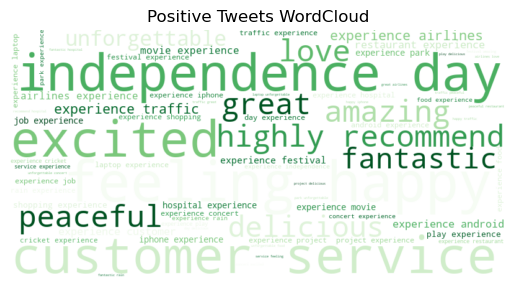

In [19]:
# Positive WordCloud
wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Tweets WordCloud")
plt.show()

In [20]:
negative_text = " ".join(df[df['sentiment'] == "Negative"]["clean_text"])

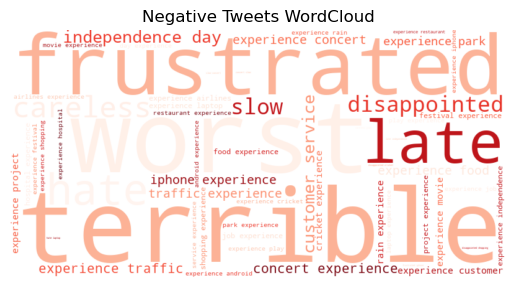

In [21]:
# Negative WordCloud
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Tweets WordCloud")
plt.show()

In [22]:
topics = ["iPhone", "Cricket", "Movie", "Traffic", "Festival", "Laptop"]

In [23]:
topic_sentiment = {}

for topic in topics:
    topic_df = df[df["tweet_text"].str.contains(topic, case=False)]
    sentiment_counts = topic_df["sentiment"].value_counts(normalize=True) * 100
    topic_sentiment[topic] = sentiment_counts


In [24]:
topic_sentiment_df = pd.DataFrame(topic_sentiment).T.fillna(0)

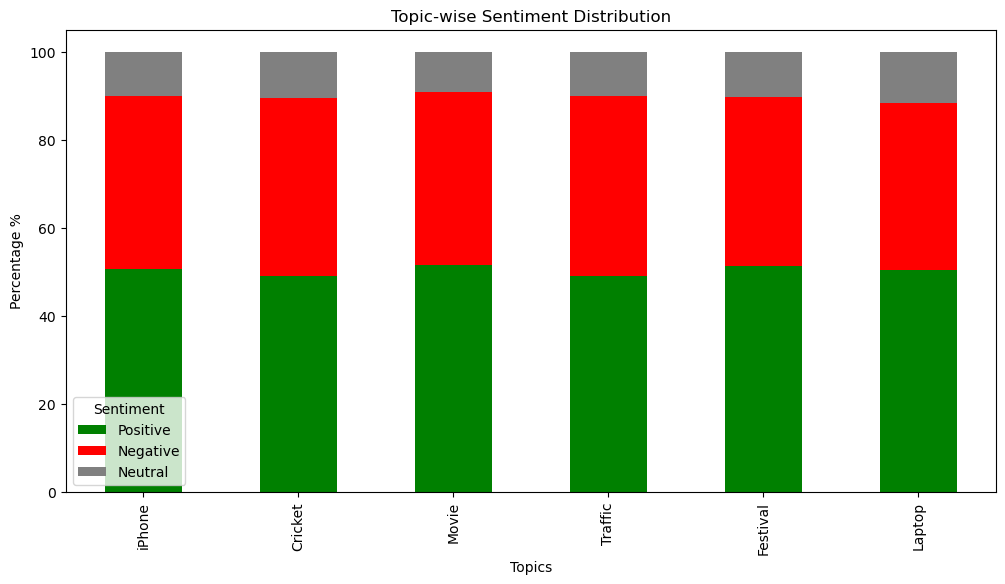

In [25]:
topic_sentiment_df.plot(kind="bar", stacked=True, figsize=(12,6), color=["green","red","grey"])
plt.title("Topic-wise Sentiment Distribution")
plt.ylabel("Percentage %")
plt.xlabel("Topics")
plt.legend(title="Sentiment")
plt.show()
